In [11]:
import numpy as np
# load model with joblib
import joblib
loaded_svm_model = joblib.load('models/model-5.pkl')

# load test features and test labels
test_features = np.load('models/test_features-clean-data.npy')
test_labels = np.load('models/test_labels-clean-data.npy')

# make predictions
print("Making predictions...")
predictions = loaded_svm_model.predict(test_features)

# classification report
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions))

Making predictions...
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       581
           1       0.66      0.80      0.72       695
           2       0.46      0.26      0.33       159
           3       0.62      0.42      0.50       275
           4       0.58      0.47      0.52       224
           5       0.51      0.27      0.36        66

    accuracy                           0.62      2000
   macro avg       0.58      0.49      0.52      2000
weighted avg       0.61      0.62      0.61      2000



Plots to see if the model is overfitting

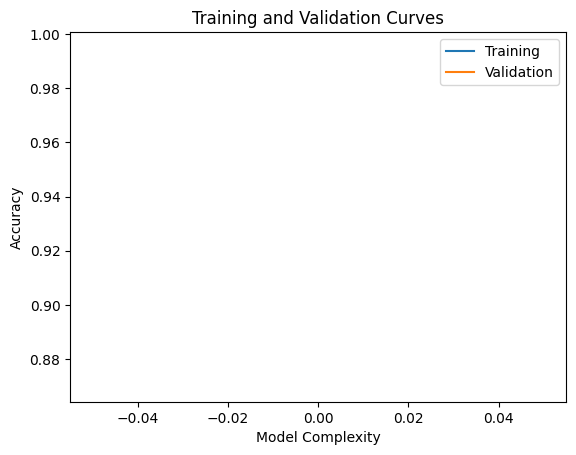

In [1]:
# plots to see if the model is overfitting
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import learning_curve, train_test_split
import numpy as np

# load model with joblib
import joblib
loaded_svm_model = joblib.load('models/model-7-over.pkl')

# load train features and train labels
train_features = np.load('models/training_features-3-over.npy')
train_labels = np.load('models/training_labels-3-over.npy')

# load test features and test labels
test_features = np.load('models/test_features-3-over.npy')
test_labels = np.load('models/test_labels-3-over.npy')

# Plot training and validation curves
train_scores = loaded_svm_model.score(train_features, train_labels)
val_scores = loaded_svm_model.score(test_features, test_labels)

plt.plot(train_scores, label="Training")
plt.plot(val_scores, label="Validation")
plt.xlabel("Model Complexity")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Curves")
plt.show()

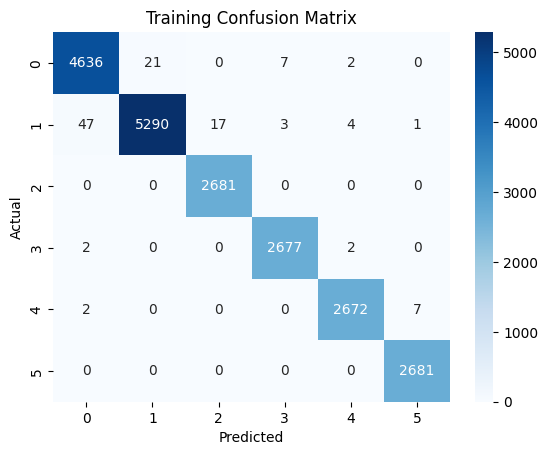

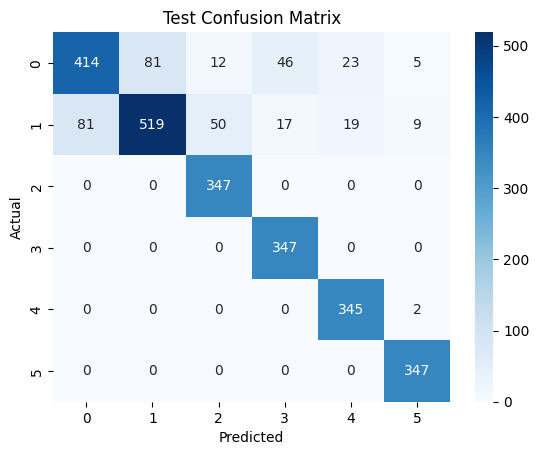

In [2]:
# Plot confusion matrix
import seaborn as sns
train_predictions = loaded_svm_model.predict(train_features)
test_predictions = loaded_svm_model.predict(test_features)

train_cm = confusion_matrix(train_labels, train_predictions)
test_cm = confusion_matrix(test_labels, test_predictions)

sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Confusion Matrix")
plt.show()

sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()


In [4]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(loaded_svm_model, train_features, train_labels, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training")
plt.plot(train_sizes, test_mean, label="Test")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


KeyboardInterrupt: 

In [ ]:
# Decision boundary visualization
h = 0.02

x_min, x_max = train_features[:, 0].min() - 1, train_features[:, 0].max() + 1
y_min, y_max = train_features[:, 1].min() - 1, train_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = loaded_svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Blues', alpha=0.5)
plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap='Blues')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()